In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:95% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color="red" size="5">ch11. 데이터프레임과 시리즈(Pandas)</font></b>
- pip install pandas / conda install padas (아나콘다 프롬프트)

# 1절. 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계

- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임(excel의 스프레드시트)을 제공

- 판다스 장점 : 파일io, 부분 데이터 추출, 크기변경, 데이터 분할, 병합, 정렬, 결측치 처리,  
  데이터분할, 피벗과 언피벗(와이드포맷과 롱포맷)에 용이

- Pandas API reference

- Pandas docs

In [6]:
import pandas as pd
pd.__version__

'1.5.3'

In [7]:
data = pd.read_csv('data/ch09_member4.csv')# encoding='utf-8' 기본값
display(data)
type(data)

,name,age,email,address
0,홍길동,22,a@a.com,신림동
1,신길동,32,b@a.com,신림동
2,김길동,42,c@a.com,신림동


pandas.core.frame.DataFrame

In [8]:
data = pd.read_csv('data/ch09_member1.csv', 
                   header=None,
                   names=['name','age', 'email','address'])
data.head(2) # 최초 상위2줄

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구


In [9]:
data = pd.read_json('data/ch09_member.json', encoding='cp949')# 기본값이 utf-8
data

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울
1,김길동,30,kildong@hong.com,인천


In [11]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris')
iris.head() # 상위 5개

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [12]:
#딕셔너리를 데이터프레임으로
d = {'kor':[100,90], 'mat':[95,99]} 
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [13]:
df.to_dict() # 데이터 프레임을 딕셔너리로 변환

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [14]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [17]:
# 딕셔너리 리스트를 데이터프레임
d = [{'kor':100, 'mat':95}, {'kor':90., 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100.0,95
1,90.0,99


In [18]:
df.dtypes

kor    float64
mat      int64
dtype: object

In [19]:
df.info() # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [20]:
d = [{'kor':100, 'mat':100}, {'kor':90, 'mat':91}, {'kor':93, 'eng':100}]
df = pd.DataFrame(data=d) 
# 결측치는 실수형(float64). 정수형변환 불가(결측치대체를 한후 정수형변환)
df

,kor,mat,eng
0,100,100.0,NaN
1,90,91.0,NaN
2,93,NaN,100.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [22]:
title = ['책1','책2','책3']
price = [15000, 18000, 10000]
df = pd.DataFrame(data={'title':title, 'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,10000


In [23]:
l = [['책1',15000],
     ['책2', 18000],
     ['책3', 10000]]
df = pd.DataFrame(l, columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


## 2.3 read_csv

In [18]:
%ls C:\ai_x\download\shareData\상가정보_250331

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\shareData\상가정보_250331 디렉터리

2025-04-28  오후 04:10    <DIR>          .
2025-04-28  오후 04:10    <DIR>          ..
2025-04-21  오후 03:13             1,011 [필독]파일열람방법.txt
2025-04-21  오후 03:21        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-21  오후 03:21       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-21  오후 03:22        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-21  오후 03:22        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-21  오후 03:22        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-21  오후 03:22        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-21  오후 03:23        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-21  오후 03:23        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-21  오후 03:23       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-21  오후 03:23         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-21  오후 03:23        28,457,489 소상

In [19]:
import pandas as pd

df = pd.read_csv(r'C:/ai_x/download/shareData/상가정보_250331/소상공인시장진흥공단_상가(상권)정보_세종_202503.csv',
                 # encoding='utf-8',
                 # sep=',',
                 low_memory=False, # 데이터 용량이 클 경우만 기입
                 nrows=30 # 처음 30행만
                )
df.shape

(30, 39)

In [20]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [21]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39 # 39열까지 display가능(기본값20)
pd.options.display.max_rows = 40 # 40행까지 display가능(기본값 60)
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [22]:
df.head(1).T

,0
상가업소번호,MA010120220700019175
상호명,세종수이비인후과의원
지점명,NaN
상권업종대분류코드,Q1
상권업종대분류명,보건의료
상권업종중분류코드,Q102
상권업종중분류명,의원
상권업종소분류코드,Q10201
상권업종소분류명,내과/소아과 의원
표준산업분류코드,Q86201


In [23]:
# (1) csv 파일 불러오기(기본값)
# encoding=utf-8, sep=',', csv파일의 첫번째 줄을 header, #이 있는 줄도 데이터로 삭제
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [24]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [26]:
import numpy as np
import pandas as pd

In [27]:
# 형변환 Age열:int64 -> int16
member['Age'] = member['Age'].astype(np.int16) # 'int' : np.int32
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


In [28]:
# 형변환 Birth열 : object(문자) -> datetime64[ns](최신버전)
member['Birth_as'] = member['Birth'].astype('datetime64[ns]')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int16(1), object(4)
memory usage: 380.0+ bytes


In [29]:
member['Birth_to'] = pd.to_datetime(member['Birth']) # astype()함수보다 안전한 형변환
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
 6   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(4)
memory usage: 428.0+ bytes


In [30]:
# (2) 특정행 제외하고 csv파일읽기
member = pd.read_csv('data/ch11_membercp949.csv',
                    encoding='cp949',
                    skiprows=[1, 6]) # 1,6번째 행은 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [34]:
# (3) 주석(#)제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_membertab.csv',
                    sep='\t',
                    comment='#',
                    parse_dates=['Birth']) # datetime형으로 읽어올 필드 지정
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [35]:
# (4) sep='|', 상위5행만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv',
                    sep='|',
                    nrows=5)
member


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : iris 데이터
- iris 가져오기 방법1 : sklearn (머신러닝 패키지)
- iris 가져오기 방법2 : statsmodels (R 데이터)
- iris 가져오기 방법3 : seaborn(시각화 패키지)

## iris 가져오기 방법1 : sklearn (머신러닝 패키지)

In [36]:
from sklearn import datasets
# sklearn : 머신러닝패키지(전처리함수, 머신러닝 함수, 성능평가를 위한 함수, 학습데이터셋)
iris = datasets.load_iris()
iris.keys() # 딕셔너리 형태

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
print(iris.DESCR) # iris데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
iris.data # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [39]:
iris.feature_names # 독립변수의 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
# 데이터 프레임에서 열이름
columns = [col[:-5].replace(' ', '_') for col in iris.feature_names]+['species']
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [41]:
iris.target
iris['target'] # 머신러닝시 종속변수

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
iris['target_names'][iris['target']]
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [44]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target]
data.shape, target.shape # 독립변수와 종속변수의 차원

((150, 4), (150,))

In [45]:
# 독립변수와 종속변수를 stack한 후 데이터 프레임으로
pd.DataFrame(data = np.hstack( (data, target.reshape(-1,1) ) ),
            columns=columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## iris 가져오기 방법2 : statsmodels (R 데이터)

In [11]:
# R언어에 있는 유명한 데이터셋을 가져오는 함수
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris',
                           package='datasets', # R의 datasets 패키지에서 가져오고,
                           cache=True) # 한번 다운로드한 데이터셋를 PC저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [12]:
iris = iris_dataset.data
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [13]:
iris['Sepal.Length']
# iris.Sepal.Length 열이름에 '.', ' '이 있으면 iris.Sepal.Length 접근불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [14]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [16]:
# 데이터 프레임을 csv파일로
iris.to_csv('data/ch11_iris.csv',
           # sep=',', encoding='utf-8', # 기본값
           index=False) # 행이름을 제외하고 파일 출력

In [17]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [18]:
# 데이터 프레임을 압축파일(.zip, .gz, .bz2)로
iris.to_csv('data/ch11_iris.zip',
            index=False,
            compression='infer')

In [19]:
load_iris = pd.read_csv('data/ch11_iris.gz', 
                        compression='infer')
load_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3절. 이름(열, 행) 지정하기
## 3.1 열이름 지정하기

In [20]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [21]:
member.columns = ['이름','나이','메일','주소','생년월일']
member.columns.name = None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정

In [22]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [23]:
member.index = range(11, 16)
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [24]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [25]:
member.index.name = None
print(member.index.name)

None


In [26]:
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [27]:
member.loc['남', '이름'] # loc을 이용하여 행이름과 열이름으로 데이터 부분 조회

'홍길남'

In [28]:
# 특정을 index로 setting
# member를 수정하려면 (1)할당 (2)inplace 매개변수에 True (기본값은 False)
member1 = member.set_index('이름') # 이름열이 index로 setting 
member1

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [29]:
member.set_index('이름', inplace=True) # 이름열을 index로

In [30]:
member.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [31]:
member.reset_index(inplace=True) # index를 컬럼(열)로

In [32]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [33]:
member.loc[1, '생년월일']

Timestamp('1999-12-01 00:00:00')

In [34]:
# 시리즈(날짜형).dt : datetime열의 날짜 및 시간에 관련된 정보만 추출
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [35]:
member['생년월일'].dt.weekday # 0:월, 1:화, ... 5:토, 6:일

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

In [36]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [37]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름', '나이', '메일', '주소', '생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [38]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [39]:
member.loc[('좌우','동'),'기본정보']

소분류
이름              홍길동
나이               20
메일    hong@hong.com
Name: (좌우, 동), dtype: object

# 4절. 부분 데이터 조회

In [40]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 열 조회

In [41]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [42]:
member[ ['Name','Email'] ]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


In [43]:
# member[0] 행을 조회할 경우 loc, iloc. []안에는 열이름이나 조건만 사용 가능

## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름과 열이름으로 조회
 - 행이름과 열이름 자리에 list ex.['Name', 'Email']
 - 행이름과 열이름 자리에 슬라이싱 from:to : from부터 to까지(from, to포함)
 - 열이름 생략시 모든 열

In [45]:
# member 0행부터 2행
member.loc[0:2]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [46]:
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [47]:
# member 동행부터 남행
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [48]:
# member 동행부터 남행, 'Name','Age','Email'
member.loc['동':'남', 'Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [49]:
# member 동행과남행, 'Name','Email','Address'
member.loc[['동','남'], ['Name','Email','Address'] ]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [50]:
# loc을 이용한 특정 열 조회
member.loc[:,['Name','Address']] # member['Name','Address'] 동일

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [51]:
member.loc['동'] # 결과가 1차원 : 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [52]:
member.loc['동':'동'] # 슬라이싱의 경우 결과가 2차원 => 데이터프레임

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.3 iloc을 이용한 조회
- df.iloc[행번호, 열번호] : 행번호과 열번호으로 조회
 - 행번호와 열번호 자리에 list ex.[0, 2]
 - 행번호와 열번호 자리에 슬라이싱 from:to:by : from부터 by씩 증감하면서 to앞까지(to는 미포함)
 - ,열번호 생략시 모든 열

In [54]:
# 0번째~2번째 행 모든 열
#member.loc['동':'남']
member.iloc[0:3] # 열번호 생략시 모든 열

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [55]:
member.iloc[0] # 결과가 1차원이면 시리즈. 데이터프레임으로 하고자 하면 슬라이싱 이용하거나
               # pd.DataFrame()함수 이용

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [56]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [57]:
# 모든 행의 마지막 열만 데이터프레임으로 추출
member.iloc[:, -1:] # member.iloc[:, -1] 1차원

,Birth
동,1999-01-01
서,1999-12-01
남,1999-11-01
북,1999-05-01
중,1999-01-30


In [58]:
# 0번째, 3번째행  0번째, 3번째, 4번째 열
member.iloc[0:4:3, [0,3,4]]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
북,홍길북,서울시 관악구,1999-05-01


## 4.4 조건으로 조회
- df[조건] : 조건에 맞는 행(모든 열)
- df.loc[조건, 열이름] 또는 df[조건][열이름] : 조건에 맞는 행의 특정 열

In [59]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [60]:
member.Age > 22

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [61]:
# Age가 22보다 큰 데이터 셋
member[member.Age>22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [62]:
member.loc[member.Age>22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [63]:
# Age가 22보다 큰 데이터의 Name과 Age
member[member.Age>22][['Name','Age']]# member[member.Age>22]['Name':'Age'] 안 됨

,Name,Age
서,홍길서,30
중,홍길중,23


In [64]:
# Age가 22보다 큰 데이터의 Name과 Age
member.loc[member.Age>22, 'Name':'Age']

,Name,Age
서,홍길서,30
중,홍길중,23


In [65]:
address1 = '서울시 강동구'
address2 = '부산시 중구'
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구')!=-1)
print(address2.count('강동구')>0)

True
False
True
False


※ 교안 pdf 29p. 시리즈에 문자함수를 쓰기 위해 참조 : https://pandas.pydata.org/pandas-  
docs/stable/reference/series.html#string-handling

In [66]:
member.Address.str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [67]:
# Address가 '서울시'로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [68]:
# Address에 '강동구'가 포함된 행
member[member.Address.str.count('강동구')>0]
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.contains('강동구')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [69]:
# Address에 '강동구'가 포함된 'Name','Age'열 조회
member[member.Address.str.contains('강동구')][['Name','Age']]
member.loc[member.Address.str.contains('강동구'), 'Name':'Age']

,Name,Age
동,홍길동,20
남,홍길남,21


In [75]:
# 1999년도 태어난 데이터
member[member.Birth.dt.year<2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


※ 데이터 프레임의 부분 데이터 조회 방법

- df[열이름] - 특정 열 모든 행조회
- df[조건] - 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름] : 이름조회, 조건(행이름 자리)으로 조회 가능
 - 열이름을 생략하면 모든 열
 - 행이름, 열이름 자리에 list, 슬라이싱
- df.iloc[행번호, 열번호] : 번호 조회
 - 열번호를 생략하면 모든 열
 - 행번호, 열번호 자리에 list, 슬라이싱

In [76]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [71]:
# 1. sepal_length 열만 출력

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)

# 6. species가 versicolor인 데이터의 모든 열

# 7. species가 setosa인 데이터 최초 5개 행만 출력

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열

In [77]:
# 1. sepal_length 열만 출력
iris['sepal_length'], iris.sepal_length

(0      5.1
 1      4.9
 2      4.7
 3      4.6
 4      5.0
       ... 
 145    6.7
 146    6.3
 147    6.5
 148    6.2
 149    5.9
 Name: sepal_length, Length: 150, dtype: float64,
 0      5.1
 1      4.9
 2      4.7
 3      4.6
 4      5.0
       ... 
 145    6.7
 146    6.3
 147    6.5
 148    6.2
 149    5.9
 Name: sepal_length, Length: 150, dtype: float64)

In [78]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, 'sepal_length':'petal_width']
iris.iloc[:11, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [79]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length'] ]  
iris.iloc[3:11, [0,2] ]  

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [80]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100]]
iris.loc[:100:50]
iris.iloc[:101:50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [81]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[[0,25,50,75,100,125], 'petal_length':'petal_width']
iris.loc[::25, 'petal_length':'petal_width']
iris.iloc[::25, 2:-1]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [82]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris.species!='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [83]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris.species=='setosa'].head()
iris[iris.species=='setosa'].iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris.sepal_length>=6.5].head()
iris[iris.sepal_length>=6.5].iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [85]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris.sepal_length >= 7.2, 'sepal_length':'petal_length']
iris[iris.sepal_length >= 7.2][['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [86]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[ (iris.species=='versicolor') & (iris.sepal_length>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [87]:
import numpy as np
np.logical_and(True, True)

True

# 5절. 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(행이름이나 열이름, axis) : axis=0 : 행삭제 / axis=1 : 열삭제

In [88]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [89]:
# (1) 단일 행 삭제
member.drop('중') # axis=0이 기본값

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [90]:
# '동'행이 없으면 에러
member.drop('동', inplace=True)

In [91]:
# (2) 복수행 삭제
member.drop(['서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [92]:
# (3) 열 삭제
member.drop(labels=['Age','Birth'], axis=1)


,Name,Email,Address
서,홍길서,seo@hong.com,서울시 중구
남,홍길남,nam@hong.com,서울시 강동구
북,홍길북,buk@hong.com,서울시 관악구
중,홍길중,mid@hong.com,부산시 중구


## 5.2 데이터 프레임의 요소 추가

In [93]:
# 데이터 프레임에 열 추가1 : 공통된 값으로 추가
member['favarite_no'] = 7 # int64
member

,Name,Age,Email,Address,Birth,favarite_no
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [94]:
# 데이터 프레임에 열추가 2 : 리스트로 추가
member['fn'] = [7,7,7, None] # 결측치 : None, np.nan, math.nan
member

,Name,Age,Email,Address,Birth,favarite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,7.0
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7,NaN


In [95]:
# 결측치는 정수형 변환 불가 (결측치 대체 후 형변환)
# member['fn'].astype('int')

In [96]:
# 데이터 프레임에 열추가 3 : 시리즈로 추가 (데이터 갯수가 부족하면 나머지는 결측치)
member = pd.read_csv('data/ch11_member.csv', comment='#')
member['fn2'] = pd.Series([7,7,7]) 
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [97]:
member['fn'] = pd.Series(['test','test1','test2'], index=[0,3,4])
member

,Name,Age,Email,Address,Birth,fn2,fn
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0,test
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,test1
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN,test2


In [98]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     5 non-null      object 
 1   Age      5 non-null      int64  
 2   Email    5 non-null      object 
 3   Address  5 non-null      object 
 4   Birth    5 non-null      object 
 5   fn2      3 non-null      float64
 6   fn       3 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 408.0+ bytes


In [99]:
# 행 추가 : 추가할 데이터를 데이터프레임 -> 기존DF, 추가할 DF 연결
member = pd.read_csv('data/ch11_member.csv')
new_member = pd.DataFrame([{
    'Name':'홀길숙',
    'Age' : 30,
    'Email':'h@h.com',
    'Address':'설',
    'Birth':'2010-01-01'
}])
new_member

,Name,Age,Email,Address,Birth
0,홀길숙,30,h@h.com,설,2010-01-01


In [100]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


# 6절. 병합과 연결
## 6.1 merge()를 이용한 병합

In [102]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                   'c2':[5,6,7,8]})
df1, df2

(  key  c1
 0   a   1
 1   b   2
 2   c   3
 3   d   4,
   key  c2
 0   a   5
 1   b   6
 2   c   7
 3   e   8)

In [108]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                   'c2':[5,6,7,8]})
display(df1)
display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [105]:
df1.merge(right=df2) # how='inner' : 양쪽 다 이리하는 데이터만 남김

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [107]:
df1.merge(right=df2, how='left') # 왼쪽 데이터만 남기고 right에 매칭되는 것만 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [109]:
df1.merge(right=df2, how='right') # right 데이터만 남기고 외쪽데이터에 매칭되는 것만 병합

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


In [110]:
df1.merge(df2, how='outer') # 양쪽 모두 다 남김

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [111]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2':[5,6,7,8]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [112]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [113]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,e,8.0


In [114]:
df3.merge(df4, left_index=True, right_index=True) # pd.concat([df3, df4],1)와 유사

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2 concat()을 이용한 연결
- pd.concat( [df1, df2], axis)
 - axis=0(기본값) : 위아래로 연결
 - axis=1 : 좌우로 연결

In [116]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c1':[5,6,7,8]})
pd.concat( [df1, df2], axis=0 ).reset_index(drop=True) 

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [117]:
# 좌우 연결
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2':[5,6,7,8]})
pd.concat( [df3, df4], axis=1 )

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절 정렬(행이름, 열이름, 값에 의한 정렬)
'100' < '9'

- df.sort_index(axis) : 행(axis=0) 또는 열(axis=1) 이름으로 정렬
- df.sort_values(by=정렬기준이 될 열이름, acending=T/F, inplace=T/F) : 값에 의한 정렬

In [118]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [119]:
member.sort_index(axis=0)
member.sort_index(axis='rows', inplace=True)# ascending=True 기본값(오름차순)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [121]:
member.sort_index(axis=1)
member.sort_index(axis='columns', inplace=True) # ascending=True 기본값
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [122]:
member.sort_values(by='Age') # 'Age'열 데이터 기준으로 오름차순 정렬(ascending:True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [123]:
member.sort_values(by='Age', ascending=False, inplace=True) # 내림차순 정렬
member

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [124]:
# 'Address'기준으로 오름차순 정렬, 'Address'가 같으면 'Age' 오름차순
member.sort_values(by=['Address','Age'])

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [125]:
# 'Address'기준으로 오름차순 정렬, 'Address'가 같으면 'Age' 내림차순
member.sort_values(by=['Address','Age'],
                  ascending=[True, False],
                  inplace=True)
member

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [126]:
# iris 데이터 셋
# (1)sepal_length값 기준(sepal_length같으면 sepal_width기준) 내림차순 정렬 적용(iris에)
# (2)행이름(index) 기준 정렬 적용(iris에 적용)
# (3)열이름(column) 기준 정렬한 내용을 출력(iris에 적용X)
from seaborn import load_dataset
iris = load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [127]:
# (1)sepal_length값 기준(sepal_length같으면 sepal_width기준) 내림차순 정렬 적용
iris.sort_values(by=['sepal_length', 'sepal_width'], ascending=False, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica


In [128]:
# (2)행이름(index) 기준 정렬 적용(iris에 적용)
iris.sort_index(inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [129]:
# (3)열이름(column) 기준 정렬한 내용을 출력(iris에 적용X)
iris.sort_index(axis=1)

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


# 8절. 기초 통계 분석
    * 판다스 : 기초통계 / statsmodels : 난이도 있는 통계
- count : NaN을 제외한 갯수
- min
- max
- sum
- cumsum : 누적합
- cumprod : 누적곱
- mean
- rolling(n).mean() : 데이터 변동(노이즈)가 다소 있을 때, 추세(패턴)을 부드럽게 보고 싶을 때
- var : 분산
- std : 표준편차
- median : 중위수(50%지점)
- qunantile : 분위수 - 0사분위수, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%) IQR = Q3-Q1 Q1-1.5IQR ~ Q3+1.5IQR 이 외의 값은 이상치
- describe : 요약통계량
- corr : 상관관계(계수)

In [17]:
import pandas as pd

In [18]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 8.1 min, max, mean, std....

In [19]:
iris.min(axis=0) # 열별 최소값(문자필드는 코드값이 작은 것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [20]:
iris.median(axis=0, numeric_only=True) # 행들의 중수(열별 중위수)
# 평균, 중위수, 표준편차, 분산 ... : 숫자필드
# numeric_only=True : numeric만 적용

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [21]:
X = iris.iloc[:,:-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5


In [22]:
X.std(axis=0)
X.std(axis='index')

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [23]:
X.mean(axis=1) # 행별 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [24]:
# quantile : 데이터프레임이나 시리즈에서 사분위수
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1, 3, 4, 7, 10], columns=['value'])
df['value'].quantile(q=[0, 0.25, 0.5, 0.75, 1.], interpolation='nearest')

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [25]:
# interpolation='midpoint' 정확한 구간을 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1.], interpolation='midpoint')

0.00     1.0
0.30     3.5
0.55     5.5
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [26]:
quant = X.quantile(q=[0, 0.25, 0.5, 0.75, 1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [27]:
min = quant.iloc[0, 0]
max = quant.iloc[4, 0]
q1 = quant.iloc[1, 0]
q3 = quant.iloc[3, 0]
min < q1-1.5*(q3-q1), max > q3 + 1.5 * (q3-q1)

(False, False)

In [28]:
X.shape, X.count(axis=0) # 결측치를 제외한 데이터 갯수

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [29]:
X.rolling(5).sum()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,24.3,16.4,7.0,1.0
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


In [30]:
# 1) 기본 요약 통계량
iris.describe() # 숫자열과 문자열이 같이 있을 경우 : 숫자열만

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
# 문자열 요약통계량 : 데이터갯수, 데이터종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [32]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame(data={'a':[1,2,3]*2,
                        'b':[2., 1]*3,
                        'c':['aaa']*5+['bbb'],
                        'd':[True, False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [33]:
df.describe() # 숫자열만 기본 요약 통계량

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [34]:
df.describe(include=['float64', 'bool'])

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [35]:
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [36]:
df.describe(exclude=object) # object 형인 컬럼만 제외하고 기본 통계량

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [37]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb'], dtype=object)

In [38]:
df['c'].value_counts()

aaa    5
bbb    1
Name: c, dtype: int64

In [39]:
df.select_dtypes(include=object) # object형 컬럼만 추출

,c
0,aaa
1,aaa
2,aaa
3,aaa
4,aaa
5,bbb


## 8.3 공분산, 상관계수

In [40]:
X = iris.iloc[:,:-1]
X.cov() # 공분산

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [41]:
# -1 <= 상관계수 <= 1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


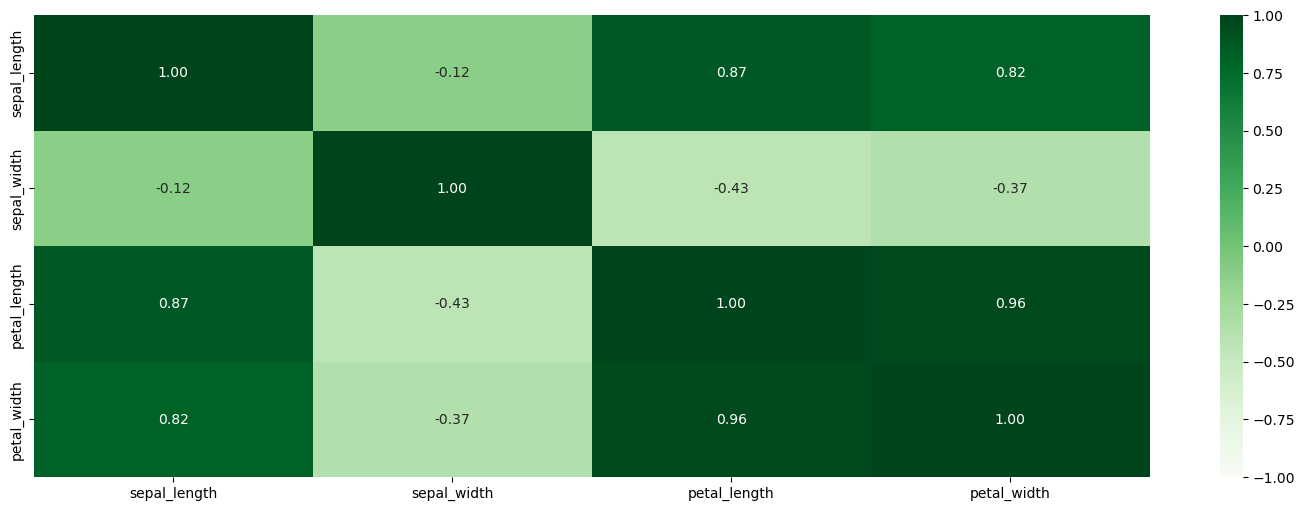

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,6))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()